In [21]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd 
from sklearn.model_selection import train_test_split 

In [22]:
#Read a file
df = pd.read_excel(r'C:\Users\jthekkel\Desktop\DataSet\Iris.xlsx',sheet_name='Iris')
print(df)

     SepalLength  Sepalwidth  PetalLength  PetalWidth        IrisType
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
5            5.4         3.9          1.7         0.4     Iris-setosa
6            4.6         3.4          1.4         0.3     Iris-setosa
7            5.0         3.4          1.5         0.2     Iris-setosa
8            4.4         2.9          1.4         0.2     Iris-setosa
9            4.9         3.1          1.5         0.1     Iris-setosa
10           5.4         3.7          1.5         0.2     Iris-setosa
11           4.8         3.4          1.6         0.2     Iris-setosa
12           4.8         3.0          1.4         0.1     Iris-setosa
13           4.3    

In [23]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 4].values  
#The X variable contains the first four columns of the dataset (i.e. attributes) while y contains the labels.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [25]:
#If some features have larger distance, they will have a bigger say in distance based algorithms. 
#This can be avoided by normalizing by something called Feature Scaling.

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [26]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [27]:
y_pred = classifier.predict(X_test)
#print(y_pred)

['Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica']


In [28]:
#classifier.score(X,y)

In [29]:
#Evaluate the Algorithm
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[ 7  0  0]
 [ 0 10  1]
 [ 0  1 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.92      0.92      0.92        12

    avg / total       0.93      0.93      0.93        30



In [31]:
#Which K value should we chose? Plot the error rate for everything where K between 1-40

error = []

for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

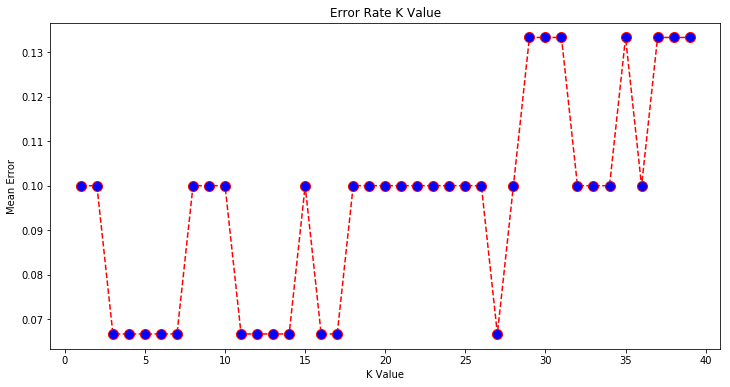

In [32]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  